In [1]:
!nvidia-smi

Thu Mar 20 16:16:15 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        On  | 00000000:02:00.0 Off |                  N/A |
| 30%   42C    P2              38W / 170W |   3245MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!nvidia-smi | grep 'python' | awk '{ print $3 }' | xargs -n1 kill -9 1287324 

kill: (1287324): No such process


In [ ]:
import warnings
import os

warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from xml.etree import ElementTree
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from skimage import measure
import xml.etree.ElementTree as ET
import cairosvg
import plotly.express as px
from PIL import Image
import shutil 
from lxml import etree
import re
import io
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K

2025-03-20 15:10:49.467646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-20 15:10:49.467682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-20 15:10:49.467712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 15:10:49.475115: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-20 15:10:50.403420: W tensorflow/compiler/

In [ ]:
# import zipfile

# with zipfile.ZipFile('/home/long/longdata/chúa phù hộ người tên khải/ml med/data/training_set.zip', 'r') as zip_ref:
#     zip_ref.extractall('data/train')

In [46]:
img = cv2.imread('/home/long/longdata/chúa phù hộ người tên khải/ml med/data/train/training_set/001_HC.png')
# # img2 = cv2.resize(img,(300,300))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Create an empty black image to draw the filled circle
# filled_img = np.zeros_like(img)

# # Fill the contour (circle) with white color
# cv2.drawContours(filled_img, contours, -1, (1), thickness=cv2.FILLED)

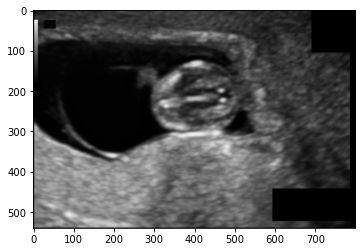

In [48]:
img_resized = img / 255.0
plt.imshow(img)

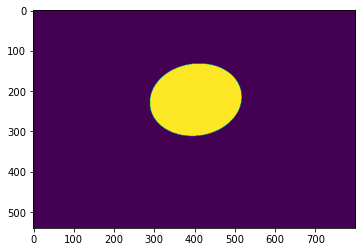

In [40]:
plt.imshow(filled_img)

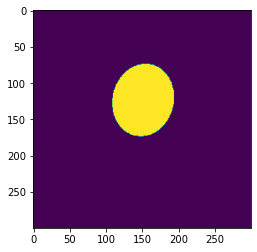

In [45]:
mask_resized = cv2.resize(filled_img, (300,300), interpolation=cv2.INTER_NEAREST)
plt.imshow(mask_resized)

In [4]:
import shutil
def split_train_val(folder_path):
    val_folder = '/home/long/longdata/chúa phù hộ người tên khải/ml med/data/val'
    os.makedirs(val_folder)
    jpg_files = sorted([f for f in os.listdir(folder_path) if f.endswith('HC.png')])

    samples =  random.sample(jpg_files,200)
    for jpg_file in samples:
        img_path = os.path.join(folder_path, jpg_file)
        to_path = os.path.join(val_folder, jpg_file)

        shutil.move(img_path, to_path)
        print(f"Moved: {jpg_file}")
        # img = cv2.imread(img_path)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # if img is None:
        #     print(f"Warning: Image file {jpg_file} could not be loaded.")
        #     continue
        
        annot_file = jpg_file.replace('HC.png', 'HC_Annotation.png')
        annot_path = os.path.join(folder_path, annot_file)
        annot_to_path = os.path.join(val_folder, annot_file)
        shutil.move(annot_path, annot_to_path)
        print(f"Moved: {annot_file}")
        

In [53]:
split_train_val('/home/long/longdata/chúa phù hộ người tên khải/ml med/data/train/training_set')

Moved: 649_HC.png
Moved: 649_HC_Annotation.png
Moved: 362_HC.png
Moved: 362_HC_Annotation.png
Moved: 752_HC.png
Moved: 752_HC_Annotation.png
Moved: 264_HC.png
Moved: 264_HC_Annotation.png
Moved: 704_2HC.png
Moved: 704_2HC_Annotation.png
Moved: 688_HC.png
Moved: 688_HC_Annotation.png
Moved: 541_2HC.png
Moved: 541_2HC_Annotation.png
Moved: 495_2HC.png
Moved: 495_2HC_Annotation.png
Moved: 465_HC.png
Moved: 465_HC_Annotation.png
Moved: 695_HC.png
Moved: 695_HC_Annotation.png
Moved: 285_HC.png
Moved: 285_HC_Annotation.png
Moved: 084_HC.png
Moved: 084_HC_Annotation.png
Moved: 440_HC.png
Moved: 440_HC_Annotation.png
Moved: 072_HC.png
Moved: 072_HC_Annotation.png
Moved: 108_HC.png
Moved: 108_HC_Annotation.png
Moved: 767_HC.png
Moved: 767_HC_Annotation.png
Moved: 304_HC.png
Moved: 304_HC_Annotation.png
Moved: 064_HC.png
Moved: 064_HC_Annotation.png
Moved: 555_HC.png
Moved: 555_HC_Annotation.png
Moved: 065_HC.png
Moved: 065_HC_Annotation.png
Moved: 482_2HC.png
Moved: 482_2HC_Annotation.png
Moved

In [31]:
def make_filled_mask(folder_path,save_dir): # deprecated
   
    if folder_path == save_dir:
        print('save dir must be different from original folder')
        return None

    else:
        # Create the directory if it doesn't exist
        os.makedirs(save_dir, exist_ok=True)

        jpg_files = sorted([f for f in os.listdir(folder_path) if f.endswith('HC.png')])
        count = 0
        for jpg_file in jpg_files:

            src_path = os.path.join(folder_path, jpg_file)
            dst_path = os.path.join(save_dir, jpg_file)
            shutil.copy(src_path,dst_path)

            

            
            annot_file = jpg_file.replace('HC.png', 'HC_Annotation.png')
            annot_path = os.path.join(folder_path, annot_file)
            filled_annot_path = os.path.join(save_dir,annot_file)
            if os.path.exists(annot_path):
                mask = cv2.imread(annot_path)
                mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
                
                contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                                # Create an empty black image to draw the filled circle
                filled_img = np.zeros_like(mask)

                # Fill the contour (circle) with white color
                cv2.drawContours(filled_img, contours, -1, (255), thickness=cv2.FILLED)
                cv2.imwrite(filled_annot_path,filled_img)
                # count +=1

            else:
                print(f"Warning: No annot file found for {jpg_file}")
        

In [25]:
data = pd.read_csv('data/training_set_pixel_size_and_HC.csv')

In [26]:
data

,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81
...,...,...,...
994,801_HC.png,0.296851,329.26
995,802_HC.png,0.212267,330.90
996,803_HC.png,0.202743,331.70
997,804_HC.png,0.281090,316.48


In [28]:
ls = [f for f in os.listdir("data/train/filled_train") if f.endswith('HC.png')]

In [49]:
filtered = data[data['filename'].isin(ls)]

In [50]:
filtered

,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
4,004_HC.png,0.061240,59.81
5,005_HC.png,0.115814,69.80
6,006_HC.png,0.065606,67.84
...,...,...,...
993,800_HC.png,0.235731,321.83
995,802_HC.png,0.212267,330.90
996,803_HC.png,0.202743,331.70
997,804_HC.png,0.281090,316.48


In [33]:
make_filled_mask("/home/long/longdata/chúa phù hộ người tên khải/ml med/data/train/training_set","/home/long/longdata/chúa phù hộ người tên khải/ml med/data/train/filled_train")

In [46]:
def just_get_ground_truth_sum(filled_annot_path):
    filled_annots = pd.Series()
    jpg_files = sorted([f for f in os.listdir(filled_annot_path) if f.endswith('HC_Annotation.png')])

    for jpg_file in jpg_files:
        img_path = os.path.join(filled_annot_path, jpg_file)
        img = cv2.imread(img_path)
        path_end = jpg_file.replace("HC_Annotation.png","HC.png")
        filled_annots[path_end] = img.sum() /255
    return filled_annots
        # yield img.sum()
    

In [47]:
array_sum = just_get_ground_truth_sum("data/train/filled_train")

In [48]:
array_sum

000_HC.png     99333.0
001_HC.png     96048.0
004_HC.png    227733.0
005_HC.png     88038.0
006_HC.png    256371.0
                ...   
800_HC.png    441357.0
802_HC.png    577392.0
803_HC.png    631098.0
804_HC.png    301533.0
805_HC.png    396684.0
Length: 799, dtype: float64

In [53]:
filtered = filtered.set_index('filename')
array_sum.name = "sum_value"
join  = filtered.join(array_sum)

In [57]:
join['product'] = join['pixel size(mm)'] * join['sum_value']

In [60]:
join['cir'] = np.sqrt(join['product'] / np.pi) * 2 *np.pi

In [61]:
join

,pixel size(mm),head circumference (mm),sum_value,product,cir
filename,,,,,
000_HC.png,0.069136,44.30,99333.0,6867.466833,293.767141
001_HC.png,0.089659,56.81,96048.0,8611.521534,328.961352
004_HC.png,0.061240,59.81,227733.0,13946.332495,418.634426
005_HC.png,0.115814,69.80,88038.0,10196.028754,357.948427
006_HC.png,0.065606,67.84,256371.0,16819.385649,459.737570
...,...,...,...,...,...
800_HC.png,0.235731,321.83,441357.0,104041.673531,1143.427404
802_HC.png,0.212267,330.90,577392.0,122561.093752,1241.027045
803_HC.png,0.202743,331.70,631098.0,127950.440686,1268.019187


In [65]:
join[['head circumference (mm)','cir']].corr('pearson')

,head circumference (mm),cir
head circumference (mm),1.000000,0.890659
cir,0.890659,1.000000


(array([ 2.,  1.,  0.,  0.,  0.,  0.,  1.,  3.,  9., 13., 15., 13., 26.,
        24., 18., 14., 15., 16., 10., 18., 12., 19., 37., 63., 79., 98.,
        78., 53., 37., 17., 13., 13., 22., 14., 15., 11.,  9.,  7.,  1.,
         3.]),
 array([ 106.56952305,  135.78454254,  164.99956204,  194.21458154,
         223.42960104,  252.64462054,  281.85964003,  311.07465953,
         340.28967903,  369.50469853,  398.71971803,  427.93473752,
         457.14975702,  486.36477652,  515.57979602,  544.79481551,
         574.00983501,  603.22485451,  632.43987401,  661.65489351,
         690.869913  ,  720.0849325 ,  749.299952  ,  778.5149715 ,
         807.729991  ,  836.94501049,  866.16002999,  895.37504949,
         924.59006899,  953.80508848,  983.02010798, 1012.23512748,
        1041.45014698, 1070.66516648, 1099.88018597, 1129.09520547,
        1158.31022497, 1187.52524447, 1216.74026397, 1245.95528346,
        1275.17030296]),
 <BarContainer object of 40 artists>)

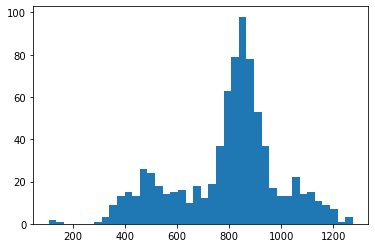

In [69]:
plt.hist(join['cir'],bins = 40)


(array([  1.,   2.,  12.,  41.,  44.,  19.,  12.,  23.,   5.,   1.,  12.,
          5.,   5.,   7.,  18.,  44., 116., 142.,  84.,  27.,  15.,   6.,
         11.,  11.,   9.,   3.,  10.,   1.,   9.,   8.,  14.,  19.,  18.,
          7.,   7.,  13.,   6.,   9.,   2.,   1.]),
 array([ 44.3   ,  51.8525,  59.405 ,  66.9575,  74.51  ,  82.0625,
         89.615 ,  97.1675, 104.72  , 112.2725, 119.825 , 127.3775,
        134.93  , 142.4825, 150.035 , 157.5875, 165.14  , 172.6925,
        180.245 , 187.7975, 195.35  , 202.9025, 210.455 , 218.0075,
        225.56  , 233.1125, 240.665 , 248.2175, 255.77  , 263.3225,
        270.875 , 278.4275, 285.98  , 293.5325, 301.085 , 308.6375,
        316.19  , 323.7425, 331.295 , 338.8475, 346.4   ]),
 <BarContainer object of 40 artists>)

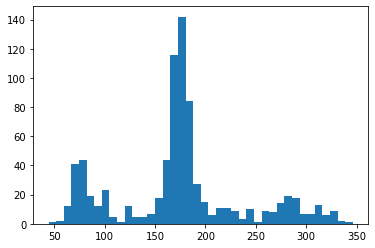

In [68]:
plt.hist(join['head circumference (mm)'],bins = 40)

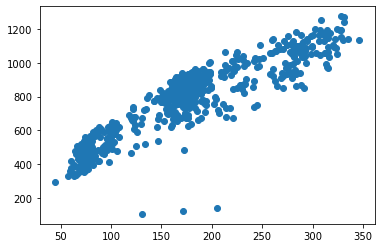

In [70]:
plt.scatter(x = join['head circumference (mm)'], y = join['cir'])

In [3]:
def load_images_and_masks(folder_path,image_size=(320, 320)): # deprecated
    images = []
    masks = []
    
    jpg_files = sorted([f for f in os.listdir(folder_path) if f.endswith('HC.png')])

    for jpg_file in jpg_files:
        img_path = os.path.join(folder_path, jpg_file)
        img = cv2.imread(img_path)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        if img is None:
            print(f"Warning: Image file {jpg_file} could not be loaded.")
            continue
        
        annot_file = jpg_file.replace('HC.png', 'HC_Annotation.png')
        annot_path = os.path.join(folder_path, annot_file)
        
        if os.path.exists(annot_path):
            mask = cv2.imread(annot_path)
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
            
            
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create an empty black image to draw the filled circle
            filled_img = np.zeros_like(mask)

            # Fill the contour (circle) with white color
            cv2.drawContours(filled_img, contours, -1, (1), thickness=cv2.FILLED)

            img_resized = cv2.resize(img, image_size)
            mask_resized = cv2.resize(filled_img, image_size, interpolation=cv2.INTER_NEAREST)
            
            img_resized = img_resized / 255.0
            # mask_resized = mask_resized /255.0
            
            
            images.append(img_resized)
            masks.append(mask_resized[..., np.newaxis]) 
        else:
            print(f"Warning: No annot file found for {jpg_file}")
    
    return np.array(images), np.array(masks)

In [6]:
img_train,mask_train =load_images_and_masks('/home/long/longdata/chúa phù hộ người tên khải/ml med/data/train/training_set')
img_val,mask_val=load_images_and_masks('/home/long/longdata/chúa phù hộ người tên khải/ml med/data/val')


In [7]:
img_train.shape

(799, 320, 320, 3)

In [8]:
def residual_block(inputs, num_filters):
    res = inputs 
    
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    if res.shape[-1] != x.shape[-1]:
        res = tf.keras.layers.Conv2D(num_filters, (1, 1), padding='same')(res)
    
    x = tf.keras.layers.Add()([x, res])
    x = tf.keras.layers.ReLU()(x)
    
    return x

def encoder_block(inputs, num_filters):
    x = residual_block(inputs, num_filters)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    return x

def decoder_block(inputs, skip_features, num_filters):
    x = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding='same')(inputs)
    if skip_features.shape[1] != x.shape[1] or skip_features.shape[2] != x.shape[2]:
        skip_features = tf.keras.layers.UpSampling2D(size=(2, 2))(skip_features)
    
    x = tf.keras.layers.Concatenate()([x, skip_features])
    x = residual_block(x, num_filters)  
    return x

# def resunet_model(input_shape=(384, 384, 3), num_classes=1):
#     inputs = tf.keras.layers.Input(input_shape)
    
#     s1 = encoder_block(inputs, 32)
#     s2 = encoder_block(s1, 64)
#     s3 = encoder_block(s2, 128)
#     s4 = encoder_block(s3, 256)
    
#     b1 = residual_block(s4, 512)
    
#     d1 = decoder_block(b1, s4, 256)
#     d2 = decoder_block(d1, s3, 128)
#     d3 = decoder_block(d2, s2, 64)
#     d4 = decoder_block(d3, s1, 32)
    
#     outputs = tf.keras.layers.Conv2D(num_classes, 1, padding='same', activation='sigmoid')(d4)
    
#     model = tf.keras.models.Model(inputs, outputs, name="ResU-Net")
    
#     return model

# model = resunet_model()
# model.summary()


def resunet_model(input_shape=(320, 320, 3), num_classes=1):
    inputs = tf.keras.layers.Input(input_shape)
    
    s1 = encoder_block(inputs, 32)
    s2 = encoder_block(s1, 64)
    s3 = encoder_block(s2, 128)
    # s4 = encoder_block(s3, 256)
    
    b1 = residual_block(s3, 256)
    
    # d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(b1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)
    
    outputs = tf.keras.layers.Conv2D(num_classes, 1, padding='same', activation='sigmoid')(d4)
    
    model = tf.keras.models.Model(inputs, outputs, name="ResU-Net")
    
    return model

model = resunet_model()
model.summary()

2025-03-17 12:35:00.525526: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-17 12:35:00.606713: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-17 12:35:00.606893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "ResU-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 320, 320, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 320, 320, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 320, 320, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 320, 320, 32)         0         ['batch_normalization[0

In [9]:
checkpoint = ModelCheckpoint(
    'models/transfer_vaga_mixed.keras', 
    monitor='val_accuracy',  
    mode='max', 
    save_best_only=True, 
    verbose=1  
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=1000,
    min_lr=0.0005)

In [10]:
img_train,mask_train =load_images_and_masks('/home/long/longdata/chúa phù hộ người tên khải/ml med/data/train/training_set')
img_val,mask_val=load_images_and_masks('/home/long/longdata/chúa phù hộ người tên khải/ml med/data/val')

In [86]:
def calculate_dice(pred_binary, gt_binary):
    """ 
    Compute dice coefficient for two binary masks.
    
    Parameters:
    -----------
    pred_binary (numpy array): Binary mask for predicted panel.
    gt_binary (numpy array): Binary mask for ground truth panel.
    
    Returns:
    --------
    float: Dice coef value.
    """

    intersection = np.logical_and(pred_binary, gt_binary).sum()
    sum_cardinality = pred_binary.sum() + gt_binary.sum()
    return 2*intersection / sum_cardinality if sum_cardinality > 0 else 0



def calculate_mean_dice(predicted_mask, gt_mask):
    """ 
    Calculate mean dice coefficient panel-wise

    Parameters:
    -----------
    predicted_mask (numpy array): Binary mask from the model.
    gt_mask (numpy array): Binary ground truth mask.

    Returns:
    --------
    float: Mean dice coef value.
    """

    pred_labels = label(predicted_mask)
    gt_labels = label(gt_mask)
    
    pred_objects = np.unique(pred_labels[pred_labels > 0])
    gt_objects = np.unique(gt_labels[gt_labels > 0])
    
    dice_values = []

    for gt_label in gt_objects:
        gt_binary = gt_labels == gt_label
        best_dice = 0
        
        for pred_label in pred_objects:
            pred_binary = pred_labels == pred_label
            dice = calculate_dice(pred_binary, gt_binary)
            best_dice = max(best_dice, dice)
        
        dice_values.append(best_dice)
    
    mean_dice = np.mean(dice_values) if dice_values else 0
    return mean_dice, dice_values


In [88]:
@tf.keras.utils.register_keras_serializable()
def dice_loss(y_true, y_pred, smooth=1e-6):
    """ 
    Dice loss function for binary segmentation.
    """
    intersection = K.sum(y_true * y_pred)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

@tf.keras.utils.register_keras_serializable()
class MeanDiceCoefficient(tf.keras.metrics.Metric):
    def __init__(self, name='mean_dice', **kwargs):
        super(MeanDiceCoefficient, self).__init__(name=name, **kwargs)
        self.dice_metric = self.add_weight(name="dice_metric", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = K.round(y_true)
        y_pred = K.round(y_pred)
        mean_dice = calculate_dice_coefficient(y_true, y_pred)

        if sample_weight is not None:
            sample_weight = K.cast(sample_weight, dtype=mean_dice.dtype)
            mean_dice = mean_dice * sample_weight

        self.dice_metric.assign_add(K.sum(mean_dice))
        self.count.assign_add(K.sum(K.ones_like(mean_dice)))

    def result(self):
        return self.dice_metric / self.count

    def reset_states(self):
        self.dice_metric.assign(0.)
        self.count.assign(0.)

In [87]:
def calculate_dice_coefficient(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.cast(y_pred, dtype='float32')
    intersection = K.sum(y_true * y_pred, axis=[1, 2, 3])
    union = K.sum(y_true, axis=[1, 2, 3]) + K.sum(y_pred, axis=[1, 2, 3])
    dice = (2. * intersection + 1e-6) / (union + 1e-6)
    return K.mean(dice)

In [89]:
@tf.keras.utils.register_keras_serializable()
class MeanDiceCoefficientPanelWise(tf.keras.metrics.Metric):
    def __init__(self, name='mean_dice_panel_wise', **kwargs):
        super(MeanDiceCoefficientPanelWise, self).__init__(name=name, **kwargs)
        self.dice_metric = self.add_weight(name="dice_metric", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        Compute the mean dice coefficient panel-wise for the batch.
        Here we calculate Dice per object/panel in the masks.
        """
        y_true = K.round(y_true)
        y_pred = K.round(y_pred)

        y_true_labels = self._get_labels(y_true)
        y_pred_labels = self._get_labels(y_pred)

        dice_values = []

        for gt_label in tf.unique(y_true_labels):
            if gt_label == 0:
                continue  

            gt_binary = K.cast(y_true_labels == gt_label, dtype=K.floatx())
            best_dice = 0

            for pred_label in tf.unique(y_pred_labels):
                if pred_label == 0:
                    continue  # Skip background label

                pred_binary = K.cast(y_pred_labels == pred_label, dtype=K.floatx())
                dice = calculate_dice_coefficient(gt_binary, pred_binary)
                best_dice = K.maximum(best_dice, dice)

            dice_values.append(best_dice)

        mean_dice = K.mean(dice_values) if dice_values else 0
        self.dice_metric.assign_add(K.sum(dice_values))
        self.count.assign_add(K.cast(K.shape(y_true)[0], dtype=self.count.dtype))

    def result(self):
        """ Return the mean dice coefficient for the batch. """
        return self.dice_metric / self.count

    def reset_states(self):
        """ Reset the metric state after each batch. """
        self.dice_metric.assign(0.)
        self.count.assign(0.)

    def _get_labels(self, binary_mask):
        """
        Convert binary mask to labeled regions using connected components.
        We use tf.unique() here to simulate labeling.
        """
        mask_flat = tf.reshape(binary_mask, [-1])
        unique_labels, _ = tf.unique(mask_flat)
        
        labeled_mask = tf.reshape(unique_labels, tf.shape(binary_mask))
        return labeled_mask

In [11]:
model = resunet_model()

decay_steps = 18000
initial_learning_rate = 0.0
warmup_steps = 200
target_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, warmup_target=target_learning_rate,
    warmup_steps=warmup_steps
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, 
              loss='binary_focal_crossentropy', 
              metrics=['accuracy'])

checkpoint = ModelCheckpoint(
    'models/best_resunet_mixed_dice_panels.keras', 
    monitor='val_loss',  
    mode='min',  
    save_best_only=True, 
    verbose=1  
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=1000,
    min_lr=0.0005
)

2025-03-17 12:35:21.671049: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [12]:
history = model.fit(
    img_train,mask_train, 
    validation_data=(img_val,mask_val),
    epochs=100,
    batch_size = 10,
    callbacks=[checkpoint, reduce_lr],
    verbose = 1
)

Epoch 1/100


2025-03-17 12:35:30.236575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-03-17 12:35:30.350923: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-03-17 12:35:32.807385: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-03-17 12:35:33.275553: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 891.16MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-03-17 12:35:34.277505: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to alloca

ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/ResU-Net/conv2d_42/Conv2D/Conv2DBackpropInput defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>

  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance

  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start

  File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 450, in process_one

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 652, in execute_request

  File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 353, in do_execute

  File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 532, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code

  File "/tmp/ipykernel_1287324/2542054002.py", line 1, in <module>

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/home/long/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

OOM when allocating tensor with shape[10,64,320,320] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/ResU-Net/conv2d_42/Conv2D/Conv2DBackpropInput}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_10367]

In [ ]:
test_images, test_masks = load_images_and_masks('/mnt/Data/Long-Data/group project/multi manga.v1i.voc/train')

for i in range(len(test_images)): 
    img = test_images[i]
    true_mask = test_masks[i]
        
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title(f"Input Image {i+1}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(true_mask.squeeze(), cmap='gray')
    plt.axis('off')